In [6]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np 
from functools import partial
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Step 1 - Use all variables

In [37]:
features_df = pd.read_csv("bitcoin_train.csv")
features_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Daily_Change,Daily_Change_Ind,MACD,...,Daily_Change_Perc_Gold,Increased_Gold,RSI_Gold,Close/Last_SP500,Open_SP500,Daily_Change_SP500,Daily_Change_Perc_SP500,Increased_SP500,RSI_SP500,label
0,268,2015-11-30,371.437012,382.363007,370.382996,377.321014,71701600,6.027008,1.0,10.296558,...,0.008807,1,33.968948,2080.41,2090.95,-10.54,-0.005041,0,57.384705,0.0
1,1016,2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,7032140000,-90.320313,0.0,-121.126607,...,0.002641,1,48.296230,2730.20,2693.52,36.68,0.013618,1,59.599184,0.0
2,1144,2019-05-23,7677.269043,7943.791504,7533.196777,7881.846680,24457107820,201.780274,1.0,625.729133,...,0.009777,1,53.162762,2822.24,2836.70,-14.46,-0.005097,0,41.547984,1.0
3,1082,2019-02-25,3807.002441,3913.707275,3807.002441,3882.696289,9318796067,72.268799,1.0,94.876946,...,-0.001802,0,58.979842,2796.11,2804.35,-8.24,-0.002938,0,45.563129,0.0
4,1149,2019-05-31,8320.286133,8586.659180,8172.550781,8574.501953,25365190957,255.029297,1.0,608.732748,...,0.013842,1,63.288965,2752.06,2766.15,-14.09,-0.005094,0,20.448755,0.0


In [38]:
features_df.columns

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', 'goog_trend_score', 'retweets_count', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff', 'RSI']

outcome = features_df.columns[-1]

print(feature_lst)
print(outcome)

['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5', 'PROC_10', 'wpr', 'sto_os', 'goog_trend_score', 'retweets_count', 'replies_count', 'Daily_Change_Perc', 'Daily_Change_Perc_Gold', 'Daily_Change_SP500', 'Daily_Change_Perc_SP500', 'compound_weighted', 'compound_weighted_avg7', 'compound_weighted_daily_diff', 'compound_weighted_weekly_diff', 'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff', 'count', 'count_daily_diff', 'count_weekly_diff', 'RSI']
label


In [39]:
X = features_df[feature_lst]
y = features_df[outcome]
print(X.shape, y.shape)

(1246, 26) (1246,)


In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1234)

In [41]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# define the grid of values to search
grid = dict()

param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.562453 using {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.554862 (0.034373) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.556699 (0.040988) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.554560 (0.040501) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.554579 (0.040892) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.562453 (0.038037) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.548917 (0.040531) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.547445 (0.037467) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.542088 (0.037739) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.546736 (0.036551) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01

Rerun adaboost with chosen hyperparameters

In [42]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 500
chosen_learning_rate: 0.1


In [43]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.5160256410256411
CONFUSION: [[ 49  92]
 [ 59 112]]


-------------
FINAL TESTING ON COMBINED VARS BITCOIN
____

In [44]:
features_df_test = pd.read_csv("bitcoin_test.csv")
features_df_test.head()
features_df_test.columns

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', 'goog_trend_score', 'retweets_count', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff', 'RSI']

outcome = features_df_test.columns[-1]

X_test = features_df_test[feature_lst]
y_test = features_df_test[outcome]


In [45]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train) 

# Predict the response for valid dataset
y_hat = adaboost.predict(X_test)


chosen_n: 500
chosen_learning_rate: 0.1


In [46]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.5480769230769231
CONFUSION: [[ 52  83]
 [ 58 119]]


In [47]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

Daily_Change: 0.016
Daily_Change_Ind: 0.0
MACD: 0.094
PROC_3: 0.026
PROC_5: 0.026
PROC_10: 0.058
wpr: 0.052
sto_os: 0.03
goog_trend_score: 0.03
retweets_count: 0.042
replies_count: 0.026
Daily_Change_Perc: 0.016
Daily_Change_Perc_Gold: 0.034
Daily_Change_SP500: 0.028
Daily_Change_Perc_SP500: 0.024
compound_weighted: 0.038
compound_weighted_avg7: 0.048
compound_weighted_daily_diff: 0.044
compound_weighted_weekly_diff: 0.034
replies_count_daily_diff: 0.05
replies_count_avg7: 0.078
replies_count_weekly_diff: 0.052
count: 0.004
count_daily_diff: 0.038
count_weekly_diff: 0.072
RSI: 0.04


[[ 52  83]
 [ 58 119]]


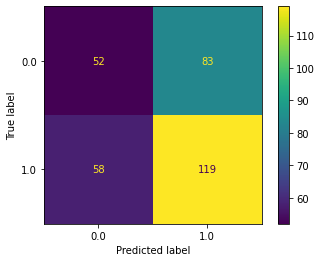

In [48]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))

# Repeat bitcoin financial variables only

In [20]:
features_df = pd.read_csv("bitcoin_train.csv")
features_df.columns

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', 'RSI']

outcome = features_df.columns[-1]

X = features_df[feature_lst]
y = features_df[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1234)

In [21]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# define the grid of values to search
grid = dict()
param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}
              
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.572775 using {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.557027 (0.040750) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.567052 (0.037960) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.572775 (0.042266) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.566018 (0.045879) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.550305 (0.040061) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.543869 (0.044943) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.547011 (0.046142) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.548116 (0.042234) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.532769 (0.044890) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.

In [22]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 1000
chosen_learning_rate: 0.01


In [23]:
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.5064102564102564
CONFUSION: [[ 44  97]
 [ 57 114]]


-------------
FINAL TESTING ON FINANCIAL VARS BITCOIN
____

In [24]:
features_df_test = pd.read_csv("bitcoin_test.csv")
features_df_test.head()
features_df_test.columns

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', 'RSI']

outcome = features_df_test.columns[-1]

X_test = features_df_test[feature_lst]
y_test = features_df_test[outcome]


In [25]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train) 

# Predict the response for valid dataset
y_hat = adaboost.predict(X_test)

chosen_n: 1000
chosen_learning_rate: 0.01


In [26]:
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.5384615384615384
CONFUSION: [[ 46  89]
 [ 55 122]]


In [27]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

Daily_Change: 0.0
Daily_Change_Ind: 0.0
MACD: 0.244
PROC_3: 0.099
PROC_5: 0.001
PROC_10: 0.181
wpr: 0.057
sto_os: 0.051
replies_count: 0.122
Daily_Change_Perc: 0.059
Daily_Change_Perc_Gold: 0.026
Daily_Change_SP500: 0.014
Daily_Change_Perc_SP500: 0.079
RSI: 0.067


[[ 46  89]
 [ 55 122]]


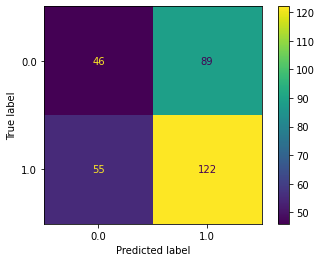

In [28]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))

----------------------------------

# Repeat for tweets vars

In [29]:
features_df = pd.read_csv("bitcoin_train.csv")

feature_lst = [ 'goog_trend_score', 'retweets_count', \
                'replies_count', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff']

outcome = features_df.columns[-1]

print(feature_lst)
print(outcome)

outcome = features_df.columns[-1]

X = features_df[feature_lst]
y = features_df[outcome]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1234)

['goog_trend_score', 'retweets_count', 'replies_count', 'compound_weighted', 'compound_weighted_avg7', 'compound_weighted_daily_diff', 'compound_weighted_weekly_diff', 'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff', 'count', 'count_daily_diff', 'count_weekly_diff']
label


In [30]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
grid = dict()

param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.562072 using {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.561687 (0.031566) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.554568 (0.036579) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.561359 (0.036729) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.562072 (0.035564) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.556711 (0.037838) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.542069 (0.039393) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.539907 (0.042809) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.555632 (0.046210) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.554587 (0.055437) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01

In [31]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 100
chosen_learning_rate: 0.1


In [32]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.5
CONFUSION: [[ 30 111]
 [ 45 126]]


-------------
FINAL TESTING ON SOCIAL VARS BITCOIN
____

In [33]:
features_df_test = pd.read_csv("bitcoin_test.csv")
features_df_test.head()
features_df_test.columns

feature_lst = [ 'goog_trend_score', 'retweets_count', \
                'replies_count', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff']

outcome = features_df_test.columns[-1]

X_test = features_df_test[feature_lst]
y_test = features_df_test[outcome]

In [34]:
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.532051282051282
CONFUSION: [[ 32 103]
 [ 43 134]]


In [35]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

goog_trend_score: 0.06
retweets_count: 0.03
replies_count: 0.05
compound_weighted: 0.08
compound_weighted_avg7: 0.16
compound_weighted_daily_diff: 0.14
compound_weighted_weekly_diff: 0.01
replies_count_daily_diff: 0.05
replies_count_avg7: 0.07
replies_count_weekly_diff: 0.1
count: 0.01
count_daily_diff: 0.09
count_weekly_diff: 0.15


[[ 32 103]
 [ 43 134]]


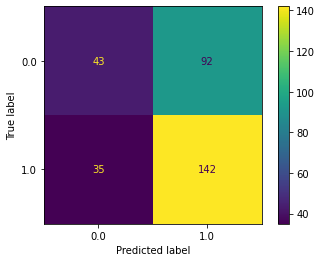

In [36]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))

-------------------------------------------

# Repeat for Dogecoin


In [67]:
dogecoin = pd.read_csv("dogecoin_train.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', 'goog_trend_score', 'retweets_count', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff', 'RSI']

outcome = features_df.columns[-1]

X_dog = dogecoin[feature_lst]
y_dog = dogecoin['label']
X_train, X_valid, y_train, y_valid = train_test_split(X_dog, y_dog, random_state = 1234)

In [68]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# define the grid of values to search
grid = dict()

param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.805308 using {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.805308 (0.002443) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.801910 (0.007982) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.799546 (0.015552) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.799546 (0.016416) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.792074 (0.024262) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.781543 (0.025356) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.796815 (0.011561) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.796135 (0.018694) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.791734 (0.023704) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.0

In [69]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 100
chosen_learning_rate: 0.01


In [70]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.7957317073170732
CONFUSION: [[261   0]
 [ 67   0]]


-------------
FINAL TESTING ON COMBINED VARS Dogecoin
____

In [71]:
dogecoin = pd.read_csv("dogecoin_test.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', 'goog_trend_score', 'retweets_count', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff', 'RSI']

outcome = features_df.columns[-1]

X_test = dogecoin[feature_lst]
y_test = dogecoin['label']


In [72]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train) 

# Predict the response for valid dataset
y_hat = adaboost.predict(X_test)

chosen_n: 100
chosen_learning_rate: 0.01


In [73]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.8140243902439024
CONFUSION: [[267   0]
 [ 61   0]]


In [74]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

Daily_Change: 0.0
Daily_Change_Ind: 0.0
MACD: 0.57
PROC_3: 0.0
PROC_5: 0.08
PROC_10: 0.0
wpr: 0.02
sto_os: 0.16
goog_trend_score: 0.02
retweets_count: 0.0
replies_count: 0.0
Daily_Change_Perc: 0.15
Daily_Change_Perc_Gold: 0.0
Daily_Change_SP500: 0.0
Daily_Change_Perc_SP500: 0.0
compound_weighted: 0.0
compound_weighted_avg7: 0.0
compound_weighted_daily_diff: 0.0
compound_weighted_weekly_diff: 0.0
replies_count_daily_diff: 0.0
replies_count_avg7: 0.0
replies_count_weekly_diff: 0.0
count: 0.0
count_daily_diff: 0.0
count_weekly_diff: 0.0
RSI: 0.0


[[267   0]
 [ 61   0]]


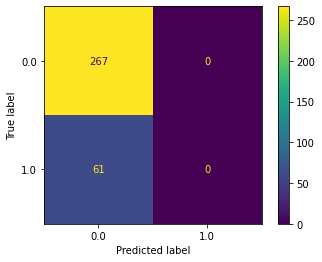

In [75]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))

----------------------

# Repeat Dogecoin financial vars

In [81]:
dogecoin = pd.read_csv("dogecoin_train.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', 'RSI']

outcome = features_df.columns[-1]

X_dog = dogecoin[feature_lst]
y_dog = dogecoin['label']
X_train, X_valid, y_train, y_valid = train_test_split(X_dog, y_dog, random_state = 1234)

In [82]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# define the grid of values to search
grid = dict()
param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.805329 using {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.805308 (0.002443) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.801910 (0.009179) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.804638 (0.016445) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.805329 (0.017951) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.793098 (0.024712) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.787989 (0.025290) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.798179 (0.011913) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.797499 (0.019511) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.797849 (0.023608) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01

In [83]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 100
chosen_learning_rate: 0.1


In [84]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.7957317073170732
CONFUSION: [[256   5]
 [ 62   5]]


-------------
FINAL TESTING ON financial VARS Dogecoin
____

In [85]:
dogecoin = pd.read_csv("dogecoin_test.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = ['Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5','PROC_10', 'wpr',\
                'sto_os', \
                'replies_count', 'Daily_Change_Perc', \
                'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'Daily_Change_Perc_SP500', 'RSI']

outcome = features_df.columns[-1]

X_test = dogecoin[feature_lst]
y_test = dogecoin['label']


In [86]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train) 

# Predict the response for valid dataset
y_hat = adaboost.predict(X_test)

chosen_n: 100
chosen_learning_rate: 0.1


In [87]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.7987804878048781
CONFUSION: [[259   8]
 [ 58   3]]


In [88]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

Daily_Change: 0.01
Daily_Change_Ind: 0.0
MACD: 0.27
PROC_3: 0.06
PROC_5: 0.1
PROC_10: 0.05
wpr: 0.1
sto_os: 0.2
replies_count: 0.0
Daily_Change_Perc: 0.06
Daily_Change_Perc_Gold: 0.0
Daily_Change_SP500: 0.02
Daily_Change_Perc_SP500: 0.03
RSI: 0.1


[[259   8]
 [ 58   3]]


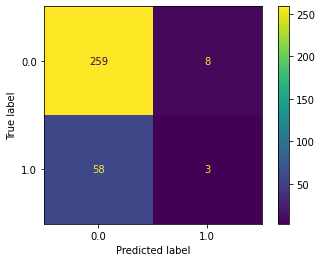

In [89]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))

------------------------

# Repeat Dogecoin social vars

In [90]:
dogecoin = pd.read_csv("dogecoin_train.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = [ 'goog_trend_score', 'retweets_count', \
                'replies_count', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff']

outcome = features_df.columns[-1]

X_dog = dogecoin[feature_lst]
y_dog = dogecoin['label']
X_train, X_valid, y_train, y_valid = train_test_split(X_dog, y_dog, random_state = 1234)

In [91]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# define the grid of values to search
grid = dict()
param_grids  = {'base_estimator__max_depth':[1,2],
              'n_estimators':[100,500,1000],
              'learning_rate':[0.01,0.1]}

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1234)

# define the grid search procedure
grid_search = GridSearchCV(estimator = model, param_grid = param_grids, n_jobs = -1, cv = cv, scoring = 'accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

mean_results = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    mean_results.append(mean)

Best: 0.805308 using {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.805308 (0.002443) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 100}
0.800206 (0.008083) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 500}
0.799186 (0.009501) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.798165 (0.010963) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 100}
0.795455 (0.017540) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 500}
0.795448 (0.020527) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1000}
0.799869 (0.009537) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 100}
0.790370 (0.015866) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 500}
0.790033 (0.018250) with: {'base_estimator__max_depth': 2, 'learning_rate': 0.0

In [92]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train)

# Predict the response for valid dataset
y_hat = adaboost.predict(X_valid)

chosen_n: 100
chosen_learning_rate: 0.01


In [93]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_valid, y_hat)
confusion = metrics.confusion_matrix(y_valid, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.7957317073170732
CONFUSION: [[261   0]
 [ 67   0]]


-------------
FINAL TESTING ON social media VARS Dogecoin
____

In [94]:
dogecoin = pd.read_csv("dogecoin_test.csv")
dogecoin = dogecoin.rename(columns={'goog_trend': 'goog_trend_score'})

feature_lst = [ 'goog_trend_score', 'retweets_count', \
                'replies_count', \
                'compound_weighted', 'compound_weighted_avg7', \
                'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff',
                'count', 'count_daily_diff', 'count_weekly_diff']

outcome = features_df.columns[-1]

X_test = dogecoin[feature_lst]
y_test = dogecoin['label']

In [95]:
chosen_depth = list(grid_result.best_params_.values())[0]
chosen_learning_rate = list(grid_result.best_params_.values())[1]
chosen_n = list(grid_result.best_params_.values())[2]
print("chosen_n:", chosen_n)
print("chosen_learning_rate:", chosen_learning_rate)

base_estimator = DecisionTreeClassifier(max_depth = chosen_depth, random_state = 1234)
adaboost = AdaBoostClassifier(base_estimator = base_estimator, n_estimators = chosen_n,
                              learning_rate = chosen_learning_rate, random_state = 1234)
# Train Adaboost Classifer
adaboost.fit(X_train, y_train) 

# Predict the response for valid dataset
y_hat = adaboost.predict(X_test)

chosen_n: 100
chosen_learning_rate: 0.01


In [96]:
# Model Accuracy with chosen decision tree depth and chosen hyperparameters
accuracy_score = metrics.accuracy_score(y_test, y_hat)
confusion = metrics.confusion_matrix(y_test, y_hat) 

print("Accuracy:", accuracy_score)
print("CONFUSION:", confusion)

Accuracy: 0.8140243902439024
CONFUSION: [[267   0]
 [ 61   0]]


In [97]:
feature_import = adaboost.feature_importances_
for i in range(len(feature_lst)):
    print(f"{feature_lst[i]}: {feature_import[i]}")

goog_trend_score: 0.65
retweets_count: 0.0
replies_count: 0.0
compound_weighted: 0.0
compound_weighted_avg7: 0.0
compound_weighted_daily_diff: 0.04
compound_weighted_weekly_diff: 0.0
replies_count_daily_diff: 0.01
replies_count_avg7: 0.0
replies_count_weekly_diff: 0.21
count: 0.0
count_daily_diff: 0.0
count_weekly_diff: 0.09


[[267   0]
 [ 61   0]]


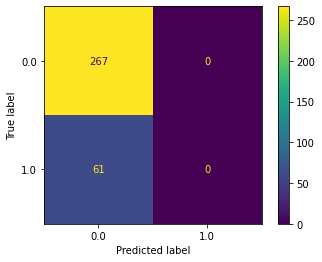

In [98]:
plot_confusion_matrix(adaboost, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_hat))